#*Univariate Linear Regression*


#### Load the Data and Libraries
---

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline

In [ ]:
import jax
import jax.numpy as jnp
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [ ]:
data = pd.read_csv('bike_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### *Visualizing* the Data

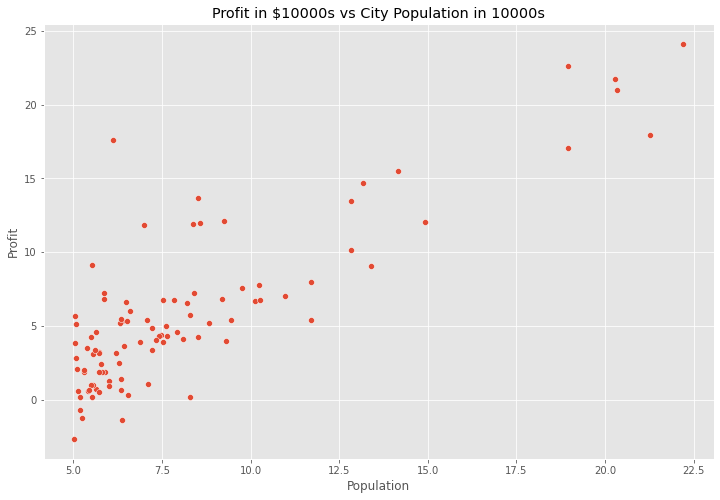

In [ ]:
ax = sns.scatterplot(x = "Population", y = "Profit", data = data)
ax.set_title("Profit in $10000s vs City Population in 10000s");

### Computing the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [ ]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    error = (y_pred - y) ** 2
    
    return 1  / (2 * m) * jnp.sum(error)

In [ ]:
m = data.Population.values.size
X = jnp.append(jnp.ones((m,1)), data.Population.values.reshape(m, 1),axis = 1)
y = data.Profit.values.reshape(m,1)
theta = jnp.zeros((2, 1))
cost_function(X, y, theta)

DeviceArray(32.07273, dtype=float32)

### Defining Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = jnp.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))
    return theta, costs

In [ ]:
theta, costs = gradient_descent(X, y, theta, alpha = 0.01, iterations = 2000)
print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)),
                               str(round(theta[1, 0], 2))))

h(x) = -3.79 + 1.18x1


###  Visualising the Cost Function $J(\theta)$
---

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
theta_0 = jnp.linspace(-10, 10, 100)
theta_1 = jnp.linspace(-1, 4, 100)

cost_values = jnp.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = jnp.array([theta_0[i], theta_1[j]])
        cost_values = cost_values.at[i, j].set(cost_function(X, y, t))
        

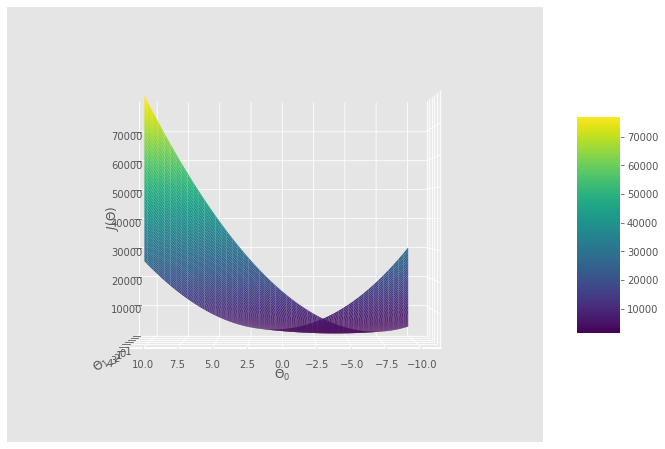

In [ ]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
ax.view_init(0, 90)

plt.show()

### Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'Values of the Cost function over iterations of Gradient Descent')

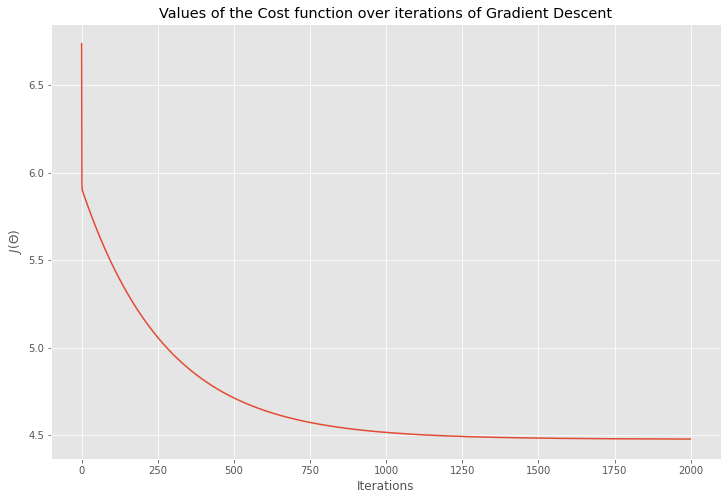

In [ ]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("$J(\Theta)$")
plt.title("Values of the Cost function over iterations of Gradient Descent")


### Training Data with Linear Regression Fit
---

In [ ]:
theta.shape

(2, 1)

In [ ]:
theta

DeviceArray([[-3.7880697],
             [ 1.182213 ]], dtype=float32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: ignored

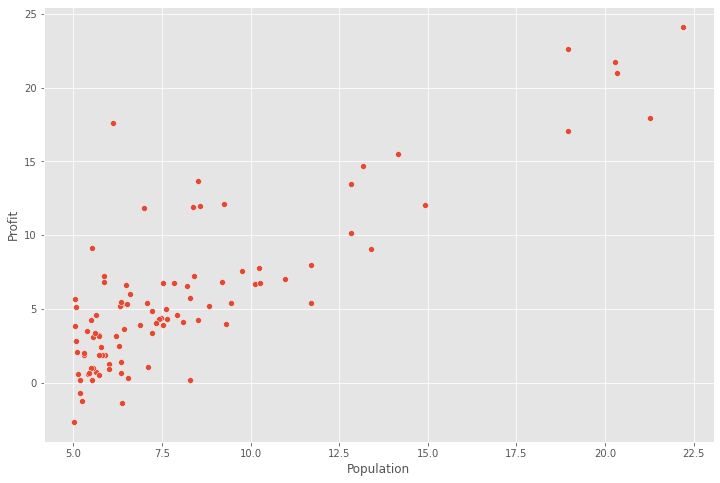

In [ ]:
theta = jnp.squeeze(theta)
sns.scatterplot(x = "Population", y = "Profit", data = data)

x_value = [x for x in range(5, 25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]


sns.lineplot(x_value, y_value)

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10000s")
plt.title("Linear Regression ")


References 

1. https://satishgunjal.com/univariate_lr/
2. https://numpy.org/doc/stable/